# RAOP Final Notebook

Shane Kramer, Monali Narayanaswami, Sybil Santos-Burgan, Jose Torres

https://github.com/ssburgan/w207_final_project

Data can be pulled from: https://www.kaggle.com/c/random-acts-of-pizza

Semester: Spring 2022

In [72]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.feature_extraction.text import *
from imblearn.over_sampling import SMOTE

import nltk

import json 
import pandas as pd 
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [81]:
# Read JSON file from data folder
#Load training data
train_data = pd.read_json('../data/random-acts-of-pizza/train.json')

# Load test data
test_data = pd.read_json('../data/random-acts-of-pizza/test.json')   


## Divide Data into Training and Dev Sets

In [82]:
train_data, dev_data, train_labels, dev_labels = train_test_split(train_data, train_data['requester_received_pizza'], test_size=0.25,random_state=0)

print('training data shape:', train_data.shape)
print('training label shape:', train_labels.shape)
print('dev data shape:',     dev_data.shape)
print('dev label shape:',      dev_labels.shape)
print('test data shape:',     test_data.shape)

training data shape: (3030, 32)
training label shape: (3030,)
dev data shape: (1010, 32)
dev label shape: (1010,)
test data shape: (1631, 17)


## Examine Data

In [83]:
train_data.head()

,giver_username_if_known,number_of_downvotes_of_request_at_retrieval,number_of_upvotes_of_request_at_retrieval,post_was_edited,request_id,request_number_of_comments_at_retrieval,request_text,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,...,requester_received_pizza,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_minus_downvotes_at_retrieval,requester_upvotes_plus_downvotes_at_request,requester_upvotes_plus_downvotes_at_retrieval,requester_user_flair,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc
3677,N/A,1,2,1,t3_soxzw,1,my roommate and I are running low on funds and...,my roommate and I are running low on funds and...,[Request] Two struggling college students tryi...,103.105475,...,False,"[AskReddit, funny, spacedicks]",18,235,24,553,None,mojo4460,1335224859,1335221259
3164,N/A,3,9,0,t3_1mwb3m,3,My car broke down and so I lost my job. The ca...,My car broke down and so I lost my job. The ca...,"[request] lost my job, broke, only have rice a...",0.000000,...,False,[],0,11,0,51,None,buoywonder77,1379867438,1379863838
2067,N/A,2,4,0,t3_j0bk0,0,Just an average engineering student doing the ...,Just an average engineering student doing the ...,[REQUEST] Final exam fuel,375.788148,...,False,"[Daleks, DoesAnybodyElse, EngineeringStudents,...",7832,17022,32396,131490,None,JustGodlyEnough,1311704360,1311700760
289,N/A,6,5,0,t3_y3otl,1,"I'm just very poor right now and very hungry, ...","I'm just very poor right now and very hungry, ...",[request],0.000000,...,False,[],0,13,0,43,None,Botanicare,1344799596,1344795996
683,johngalt1337,0,6,1368820535,t3_1ejbbj,3,I'm a broke college kid working a part time jo...,I'm a broke college kid working a part time jo...,(Request) paycheck at my part time job is comi...,154.871609,...,True,"[AskReddit, WTF, gaming, loseit, todayilearned]",8,85,28,183,shroom,ceevar,1368823216,1368819616


In [64]:
train_data.describe()

,number_of_downvotes_of_request_at_retrieval,number_of_upvotes_of_request_at_retrieval,post_was_edited,request_number_of_comments_at_retrieval,requester_account_age_in_days_at_request,requester_account_age_in_days_at_retrieval,requester_days_since_first_post_on_raop_at_request,requester_days_since_first_post_on_raop_at_retrieval,requester_number_of_comments_at_request,requester_number_of_comments_at_retrieval,...,requester_number_of_posts_at_retrieval,requester_number_of_posts_on_raop_at_request,requester_number_of_posts_on_raop_at_retrieval,requester_number_of_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_minus_downvotes_at_retrieval,requester_upvotes_plus_downvotes_at_request,requester_upvotes_plus_downvotes_at_retrieval,unix_timestamp_of_request,unix_timestamp_of_request_utc
count,3030.000000,3030.000000,3.030000e+03,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,...,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3.030000e+03,3.030000e+03,3.030000e+03,3.030000e+03
mean,2.429373,6.083828,1.022706e+08,2.851155,252.943695,754.964089,16.200770,517.615302,113.323102,281.531023,...,40.677558,0.065347,1.238284,17.862046,1182.262706,2733.810891,3.959098e+03,8.102099e+03,1.342915e+09,1.342912e+09
std,3.025062,10.300675,3.586005e+08,4.759168,304.759138,335.475035,70.256114,268.061699,192.633096,353.502227,...,82.190283,0.337519,0.599317,21.758969,4115.730519,6829.777716,2.941670e+04,4.445377e+04,2.334330e+07,2.334257e+07
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,45.291562,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-67.000000,-55.000000,0.000000e+00,0.000000e+00,1.306186e+09,1.306183e+09
25%,1.000000,2.000000,0.000000e+00,0.000000,3.009667,518.044884,0.000000,275.578799,0.000000,7.000000,...,2.000000,0.000000,1.000000,1.000000,2.000000,20.000000,8.000000e+00,4.800000e+01,1.320538e+09,1.320534e+09
50%,2.000000,4.000000,0.000000e+00,1.000000,155.848154,748.245995,0.000000,520.379034,22.500000,107.000000,...,12.000000,0.000000,1.000000,10.500000,171.500000,656.000000,3.360000e+02,1.186500e+03,1.342757e+09,1.342753e+09
75%,3.000000,7.000000,0.000000e+00,4.000000,386.384479,897.446302,0.000000,777.339688,134.000000,449.750000,...,44.000000,0.000000,1.000000,27.000000,1141.750000,3220.000000,2.274750e+03,6.577750e+03,1.364695e+09,1.364692e+09
max,47.000000,345.000000,1.380909e+09,61.000000,2809.750787,2879.276319,785.457685,927.447442,981.000000,1000.000000,...,999.000000,5.000000,9.000000,186.000000,155010.000000,223708.000000,1.286864e+06,2.046482e+06,1.381373e+09,1.381345e+09


In [65]:
#Check for null values
train_data.isnull().sum()

giver_username_if_known                                    0
number_of_downvotes_of_request_at_retrieval                0
number_of_upvotes_of_request_at_retrieval                  0
post_was_edited                                            0
request_id                                                 0
request_number_of_comments_at_retrieval                    0
request_text                                               0
request_text_edit_aware                                    0
request_title                                              0
requester_account_age_in_days_at_request                   0
requester_account_age_in_days_at_retrieval                 0
requester_days_since_first_post_on_raop_at_request         0
requester_days_since_first_post_on_raop_at_retrieval       0
requester_number_of_comments_at_request                    0
requester_number_of_comments_at_retrieval                  0
requester_number_of_comments_in_raop_at_request            0
requester_number_of_comm

In [75]:
#Fill in null values
train_data['requester_user_flair'].fillna("",inplace=True)
train_data['requester_user_flair']

3677          
3164          
2067          
289           
683     shroom
         ...  
835           
3264          
1653    shroom
2607          
2732          
Name: requester_user_flair, Length: 3030, dtype: object


For first 5 training examples, print the title of request

In [39]:
def display_request(num_examples=5):

    for i in range(num_examples):
        print(train_data.iloc[i]['request_title']) 
        print(train_data.iloc[i]['request_text'])
        print('Received Pizza: ', train_data.iloc[i]['requester_received_pizza']) 
        print('\n')  
        
display_request(5)

[Request] Two struggling college students trying to eat good tonight
my roommate and I are running low on funds and a good pizza would be greatly appreciated
Edit: From Kansas USA
Received Pizza:  False


[request] lost my job, broke, only have rice and food for the dog.
My car broke down and so I lost my job. The car was required for the job. My ex-employer is fighting my unemployment claim. It seems like they want to punish me for leaving them at a busy time so no help there.  I  My dog and I will have to move into my friend's shed at the end of the month. my dog is like my child and my last dollar went to feeding him. I'm very depressed. I spend 70-80 hours a week looking for work to no avail since I have no car any more. It would be angelic if someone could lift my spirits with a pizza.  I have verification if I'm fortunate enough to get a little help. Thank you and I hope everyone has a great day.- Jason
Received Pizza:  False


[REQUEST] Final exam fuel
Just an average engineerin

### Review Dataset Skewness


The data is imbalanced weighing towards the majority class requester_received_pizza = False. This degrades the predictive power of our models. Applying a machinine learning model on a biased dataset may result in predictions that lean towards the majority class. 

<AxesSubplot:xlabel='requester_received_pizza'>

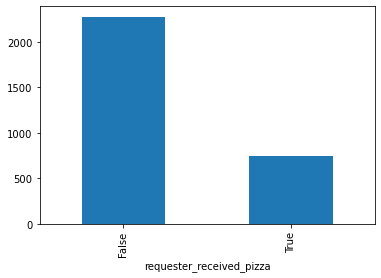

In [76]:
train_data.groupby('requester_received_pizza').size().plot(kind = "bar")